In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# Plot the summary table as a figure
def plot_table(df,w="Without transfer learning"):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis("tight")
    ax.axis("off")
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc="center", loc="center")
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))
    plt.title(f"Model Metrics Summary ({w})")
    plt.show()

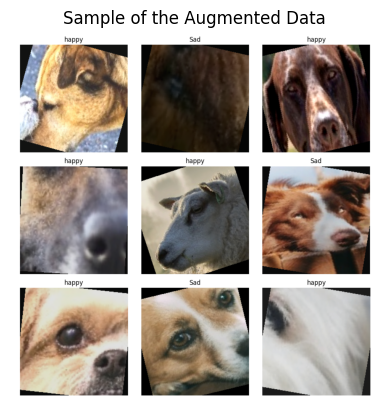

In [ ]:
# Load the image
img = mpimg.imread('data_examples.png')
# Display the image
plt.imshow(img)
plt.title('Sample of the Augmented Data')
plt.axis('off')  # Hide axis
plt.show()

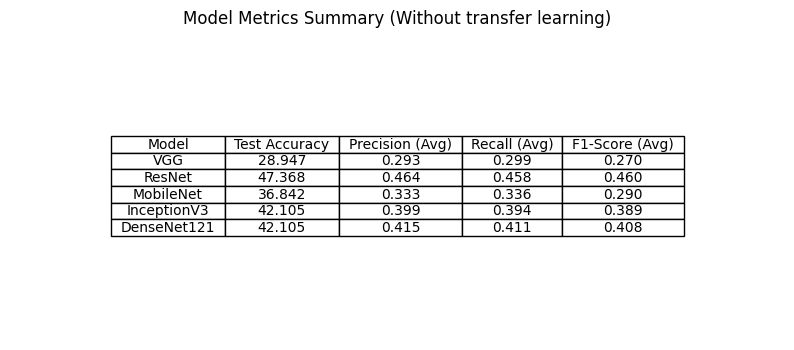

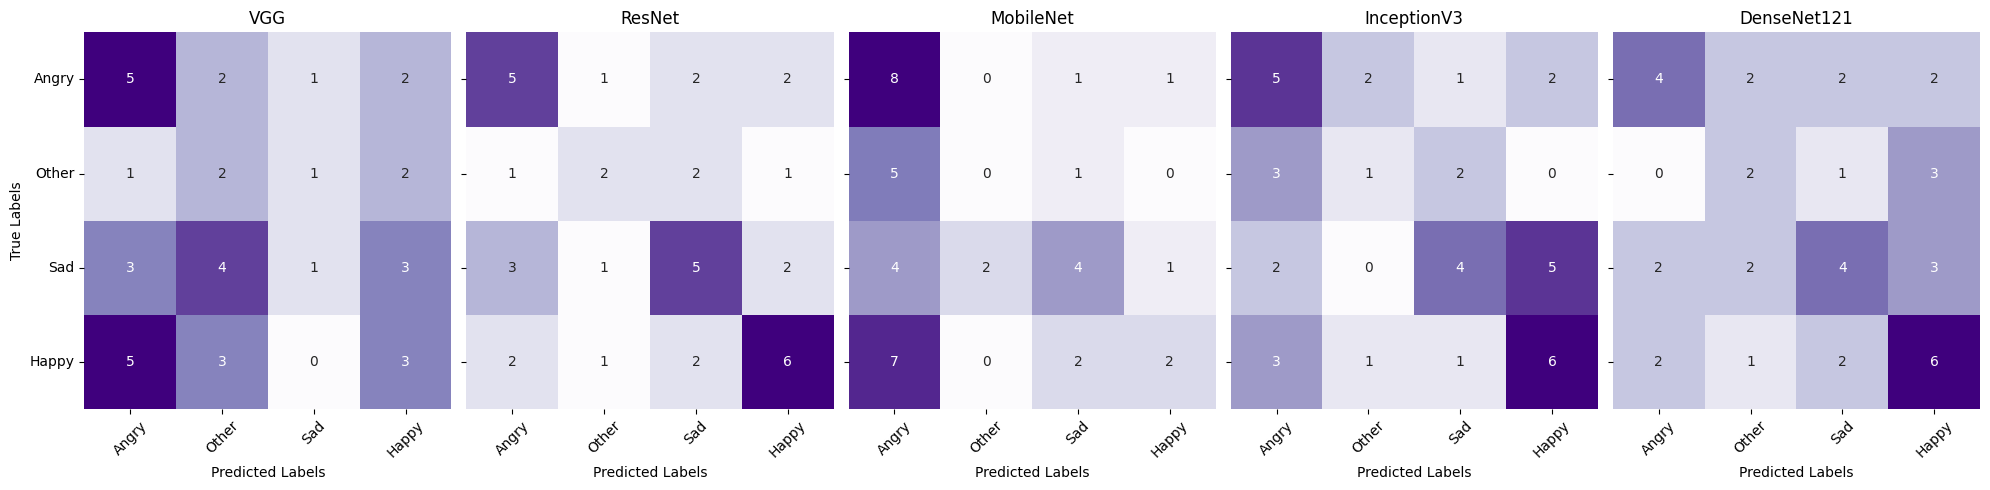

In [ ]:
# List of models and their corresponding JSON file names
models = ["VGG", "ResNet", "MobileNet", "InceptionV3", "DenseNet121"]
file_template = "evaluation_results_{}.json"

# Initialize a DataFrame to store metrics
data = []

# Loop through models to extract metrics
for model in models:
    file_name = file_template.format(model)

    # Load the JSON file
    with open(file_name, 'r') as file:
        results = json.load(file)

    # Extract relevant metrics
    test_accuracy = results.get("test_accuracy", None)
    macro_avg = results["classification_report"].get("macro avg", {})
    confusion_matrix = results.get("confusion_matrix", None)

    # Append to data list with numbers formatted to 3 decimal places
    data.append({
        "Model": model,
        "Test Accuracy": f"{test_accuracy*100:.3f}",
        "Precision (Avg)": f"{macro_avg.get('precision', 0):.3f}",
        "Recall (Avg)": f"{macro_avg.get('recall', 0):.3f}",
        "F1-Score (Avg)": f"{macro_avg.get('f1-score', 0):.3f}",
        "Confusion Matrix": confusion_matrix
    })


# Create a DataFrame for the summary table
summary_df = pd.DataFrame(data)

# Save the summary table to a CSV file
summary_df.drop(columns="Confusion Matrix").to_csv("model_metrics_summary.csv", index=False)


plot_table(summary_df.drop(columns="Confusion Matrix"))

# Plot confusion matrices as subplots
fig, axes = plt.subplots(1, len(data), figsize=(20, 5), sharey=True)
classes = ["Angry", "Other", "Sad", "Happy"]
for idx, model_data in enumerate(data):
    model = model_data["Model"]
    confusion_matrix = model_data["Confusion Matrix"]

    if confusion_matrix:
        ax = axes[idx]
        sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Purples", cbar=False, ax=ax, xticklabels=classes, yticklabels=classes)
        ax.set_xticklabels(classes, rotation=45)
        ax.set_yticklabels(classes, rotation=0)
        ax.set_title(model)
        ax.set_xlabel("Predicted Labels")
        if idx == 0:
            ax.set_ylabel("True Labels")

plt.tight_layout()
plt.show()



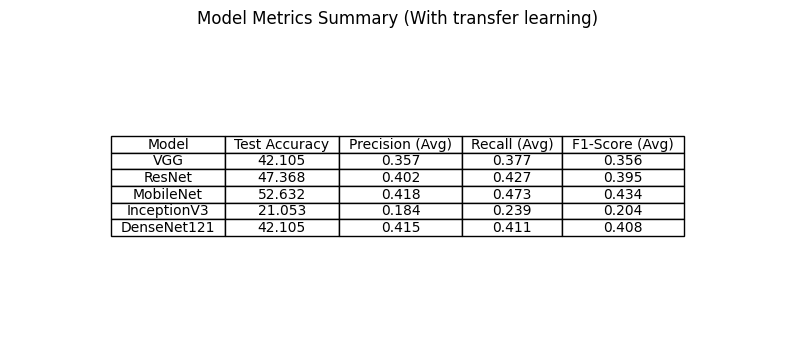

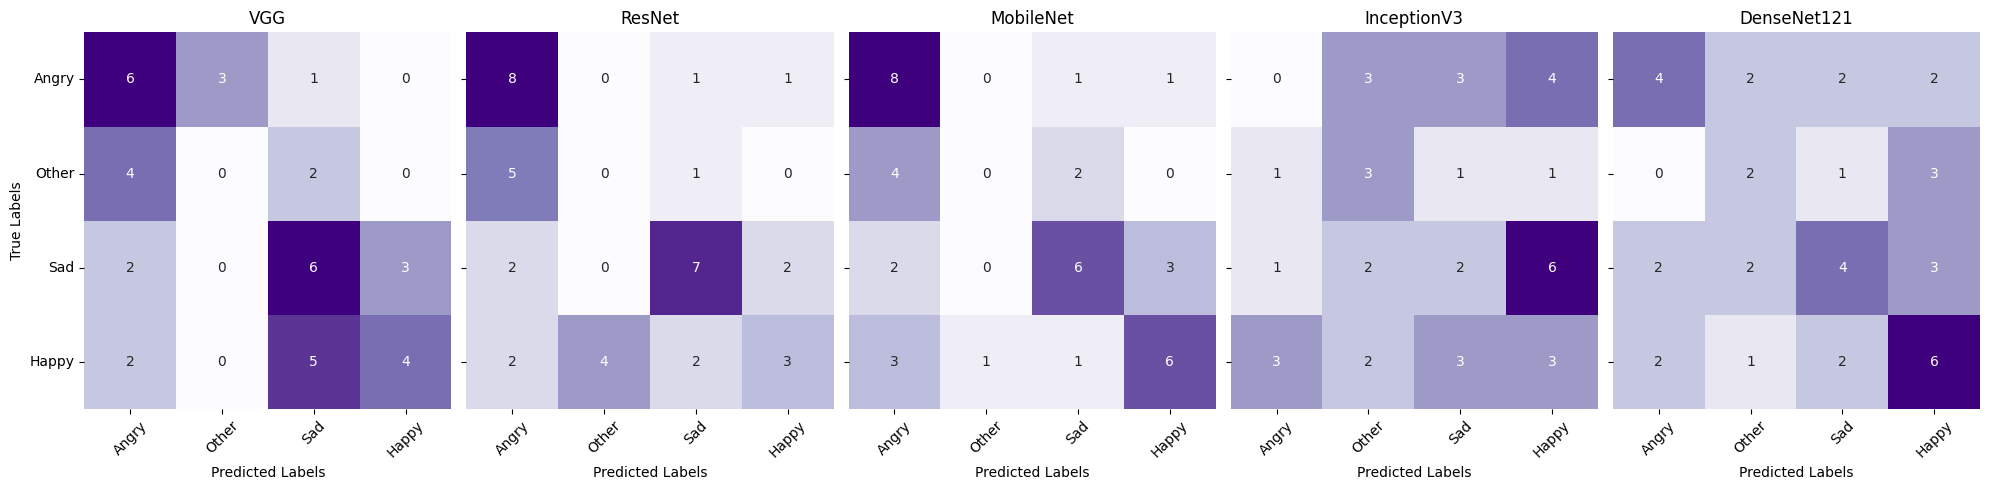

In [ ]:
# List of models and their corresponding JSON file names
models = ["VGG", "ResNet", "MobileNet", "InceptionV3", "DenseNet121"]
file_template = "evaluation_results_{}_transfer.json"

# Initialize a DataFrame to store metrics
data = []

# Loop through models to extract metrics
for model in models:
    file_name = file_template.format(model)

    # Load the JSON file
    with open(file_name, 'r') as file:
        results = json.load(file)

    # Extract relevant metrics
    test_accuracy = results.get("test_accuracy", None)
    macro_avg = results["classification_report"].get("macro avg", {})
    confusion_matrix = results.get("confusion_matrix", None)

    # Append to data list with numbers formatted to 3 decimal places
    data.append({
        "Model": model,
        "Test Accuracy": f"{test_accuracy*100:.3f}",
        "Precision (Avg)": f"{macro_avg.get('precision', 0):.3f}",
        "Recall (Avg)": f"{macro_avg.get('recall', 0):.3f}",
        "F1-Score (Avg)": f"{macro_avg.get('f1-score', 0):.3f}",
        "Confusion Matrix": confusion_matrix
    })


# Create a DataFrame for the summary table
summary_df = pd.DataFrame(data)

# Save the summary table to a CSV file
summary_df.drop(columns="Confusion Matrix").to_csv("model_metrics_summary.csv", index=False)


plot_table(summary_df.drop(columns="Confusion Matrix"),w="With transfer learning")

# Plot confusion matrices as subplots
fig, axes = plt.subplots(1, len(data), figsize=(20, 5), sharey=True)
classes = ["Angry", "Other", "Sad", "Happy"]
for idx, model_data in enumerate(data):
    model = model_data["Model"]
    confusion_matrix = model_data["Confusion Matrix"]

    if confusion_matrix:
        ax = axes[idx]
        sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Purples", cbar=False, ax=ax, xticklabels=classes, yticklabels=classes)
        ax.set_xticklabels(classes, rotation=45)
        ax.set_yticklabels(classes, rotation=0)
        ax.set_title(model)
        ax.set_xlabel("Predicted Labels")
        if idx == 0:
            ax.set_ylabel("True Labels")

plt.tight_layout()
plt.show()

